Enter the parameters for 3D gravitational lensing simulation:
Mass of the lens (in solar masses): 1e2
Distance to the lens (in parsecs): 2e2
Distance to the source (in parsecs): 2e4
Source x-position (in arcseconds): 0.5
Source y-position (in arcseconds): 0.6
Source z-position (in arcseconds): .8
Einstein radius: 0.06 arcseconds


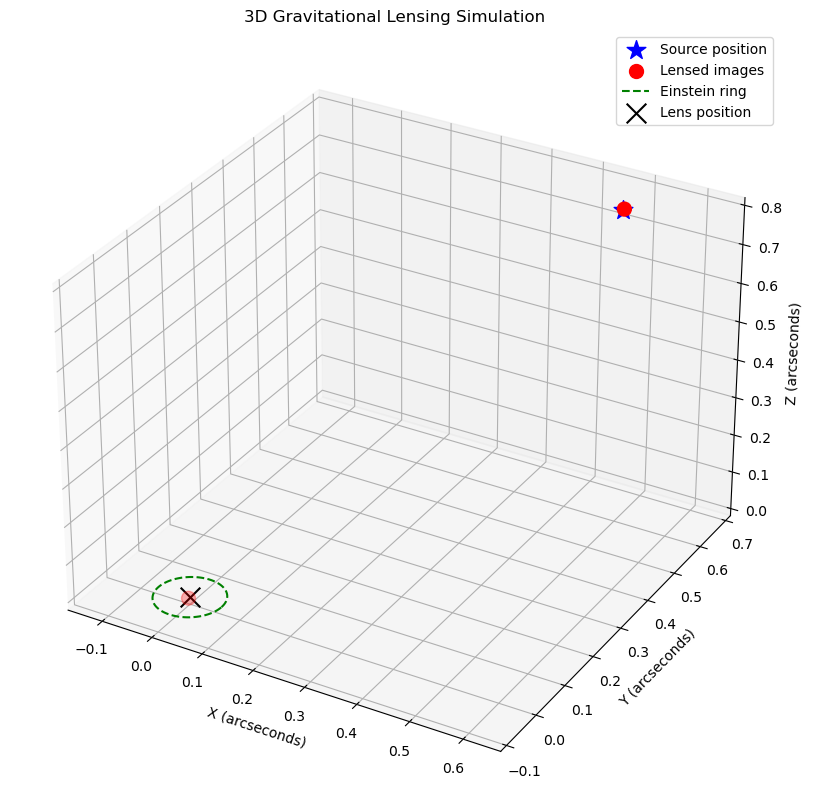

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gravitational_lensing_3d():
    # Constants
    G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
    c = 2.99792458e8  # Speed of light (m/s)
    pc_to_m = 3.08567758e16  # Parsecs to meters
    solar_mass_to_kg = 1.989e30  # Solar mass to kg

    # User input
    print("Enter the parameters for 3D gravitational lensing simulation:")
    mass_solar = float(input("Mass of the lens (in solar masses): "))
    D_L = float(input("Distance to the lens (in parsecs): "))
    D_S = float(input("Distance to the source (in parsecs): "))
    source_pos_x = float(input("Source x-position (in arcseconds): "))
    source_pos_y = float(input("Source y-position (in arcseconds): "))
    source_pos_z = float(input("Source z-position (in arcseconds): "))

    # Convert inputs to SI units
    M = mass_solar * solar_mass_to_kg  # Lens mass in kg
    D_L = D_L * pc_to_m  # Distance to lens in meters
    D_S = D_S * pc_to_m  # Distance to source in meters
    D_LS = D_S - D_L  # Distance from lens to source

    # Convert source position from arcseconds to radians
    arcsec_to_rad = np.pi / (180 * 3600)
    beta = np.array([source_pos_x, source_pos_y, source_pos_z]) * arcsec_to_rad

    # Calculate Einstein radius (in radians)
    theta_E = np.sqrt((4 * G * M / c**2) * (D_LS / (D_L * D_S)))
    print(f"Einstein radius: {theta_E / arcsec_to_rad:.2f} arcseconds")

    # Lens equation: Solve for image positions (theta)
    # For a point mass, lens equation is: theta = beta + (theta_E^2 / |theta|) * (theta / |theta|)
    def solve_lens_equation_3d(beta, theta_E):
        # Magnitude of the source position vector
        beta_mag = np.sqrt(np.sum(beta**2))
        if beta_mag == 0:
            return None  # No lensing if source is exactly behind the lens

        # Solve the lens equation: theta^2 - beta*theta - theta_E^2 = 0
        # This is a quadratic equation for the magnitude of theta
        a = 1
        b_coeff = -beta_mag
        c = -theta_E**2
        delta = b_coeff**2 - 4*a*c
        if delta < 0:
            return None  # No real solutions

        # Solve for the magnitude of theta
        theta_mag1 = (-b_coeff + np.sqrt(delta)) / (2*a)
        theta_mag2 = (-b_coeff - np.sqrt(delta)) / (2*a)

        # Scale the beta vector to get the image positions
        theta1 = (theta_mag1 / beta_mag) * beta
        theta2 = (theta_mag2 / beta_mag) * beta
        return np.array([theta1, theta2])  # Two image positions

    # Get image positions
    image_positions = solve_lens_equation_3d(beta, theta_E)
    if image_positions is None:
        print("No real image positions found. Try adjusting parameters.")
        return

    # Convert positions back to arcseconds for plotting
    image_positions = image_positions / arcsec_to_rad
    beta_plot = beta / arcsec_to_rad

    # Plotting in 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot source position
    ax.scatter([beta_plot[0]], [beta_plot[1]], [beta_plot[2]], c='blue', marker='*', s=200, label='Source position')

    # Plot lensed images
    ax.scatter(image_positions[:, 0], image_positions[:, 1], image_positions[:, 2], c='red', marker='o', s=100, label='Lensed images')

    # Plot Einstein ring in the lens plane (z=0)
    theta = np.linspace(0, 2*np.pi, 100)
    ring_x = (theta_E / arcsec_to_rad) * np.cos(theta)
    ring_y = (theta_E / arcsec_to_rad) * np.sin(theta)
    ring_z = np.zeros_like(theta)
    ax.plot(ring_x, ring_y, ring_z, c='green', linestyle='--', label='Einstein ring')

    # Plot lens position
    ax.scatter([0], [0], [0], c='black', marker='x', s=200, label='Lens position')

    # Set labels and title
    ax.set_xlabel('X (arcseconds)')
    ax.set_ylabel('Y (arcseconds)')
    ax.set_zlabel('Z (arcseconds)')
    ax.set_title('3D Gravitational Lensing Simulation')
    ax.legend()

    # Set equal aspect ratio (approximate, as 3D plots don't enforce perfect equality)
    max_range = np.array([image_positions[:, 0].ptp(), image_positions[:, 1].ptp(), image_positions[:, 2].ptp()]).max() / 2.0
    mid_x = np.mean(image_positions[:, 0])
    mid_y = np.mean(image_positions[:, 1])
    mid_z = np.mean(image_positions[:, 2])
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    plt.show()

if __name__ == "__main__":
    gravitational_lensing_3d()